In [1]:
%autosave 0
%matplotlib notebook

Autosave disabled


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import Matrix, init_printing
init_printing()

In [3]:
data = np.array([
    [172, 58, 63],
    [180, 80, 85],
    [175, 60, 70],
    [162, 50, 65],
    [167, 63, 70],
    [151, 45, 59],
    [188, 70, 90],
    [170, 70, 70],
    [166, 61, 66],
])

In [4]:
avg = np.array([np.mean(data[:, 0]), np.mean(data[:, 1]), np.mean(data[:, 2])])
avg

array([170.11111111,  61.88888889,  70.88888889])

In [5]:
cov = np.cov(data.T)
Matrix(cov)

⎡112.861111111111  90.7638888888889  95.0138888888889⎤
⎢                                                    ⎥
⎢90.7638888888889  113.361111111111  88.7361111111111⎥
⎢                                                    ⎥
⎣95.0138888888889  88.7361111111111  103.611111111111⎦

In [6]:
# 固有値, 固有ベクトル
ev, evec = np.linalg.eig(cov)
evec = evec.T
Matrix(evec)

⎡-0.58904357698053   -0.576998859387866  -0.565773789321389⎤
⎢                                                          ⎥
⎢-0.634318860412278  -0.103630316639308  0.766094211437801 ⎥
⎢                                                          ⎥
⎣0.500666803116854   -0.810143859902881  0.304958486549253 ⎦

In [7]:
Matrix(ev)

⎡293.029493323743⎤
⎢                ⎥
⎢12.9370765367566⎥
⎢                ⎥
⎣23.8667634728339⎦

In [8]:
# 寄与率
crate = ev / np.sum(ev)
Matrix(crate)

⎡0.888416856969407 ⎤
⎢                  ⎥
⎢0.0392230718648507⎥
⎢                  ⎥
⎣0.0723600711657421⎦

In [9]:
# 累積寄与率
(crate[0], crate[0] + crate[2], crate[0] + crate[1] + crate[2])

In [10]:
# 描画のために寄与率順にソートする
evec = np.array([evec[0], evec[2], evec[1]])
Matrix(evec)

⎡-0.58904357698053   -0.576998859387866  -0.565773789321389⎤
⎢                                                          ⎥
⎢0.500666803116854   -0.810143859902881  0.304958486549253 ⎥
⎢                                                          ⎥
⎣-0.634318860412278  -0.103630316639308  0.766094211437801 ⎦

In [11]:
# それぞれの内積はほぼ0
evec[0].dot(evec[1]), evec[0].dot(evec[2]), evec[1].dot(evec[2])

<IPython.core.display.Javascript object>


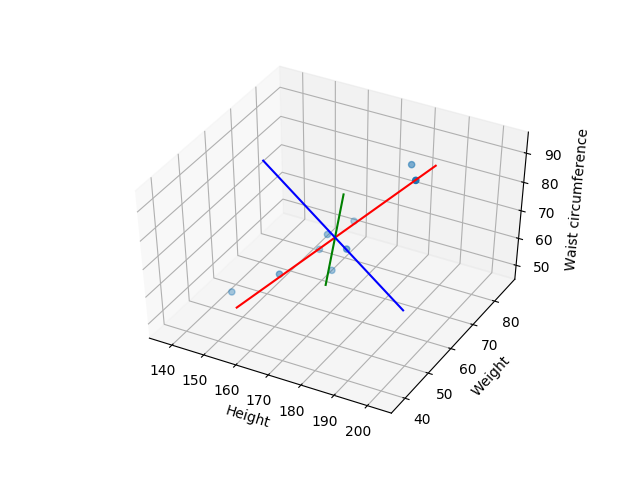

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
ax.axis('equal')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Waist circumference')

distance = np.sqrt(((data.max(axis=0) - data.min(axis=0)) ** 2).sum())
right = distance / 2
left = -right

xs0 = np.array([evec[0][0] * left, evec[0][0] * right]) + avg[0]
ys0 = np.array([evec[0][1] * left, evec[0][1] * right]) + avg[1]
zs0 = np.array([evec[0][2] * left, evec[0][2] * right]) + avg[2]

xs1 = np.array([evec[1][0] * left, evec[1][0] * right]) + avg[0]
ys1 = np.array([evec[1][1] * left, evec[1][1] * right]) + avg[1]
zs1 = np.array([evec[1][2] * left, evec[1][2] * right]) + avg[2]

xs2 = np.array([evec[2][0] * left, evec[2][0] * right]) + avg[0]
ys2 = np.array([evec[2][1] * left, evec[2][1] * right]) + avg[1]
zs2 = np.array([evec[2][2] * left, evec[2][2] * right]) + avg[2]

ax.plot(xs0, ys0, zs0, 'r')
ax.plot(xs1, ys1, zs1, 'g')
ax.plot(xs2, ys2, zs2, 'b')

ax.scatter(data[:,0], data[:,1], data[:,2])